# **Automatic License Plate Recognition**

## **Phần I: Mô tả đồ án**

*   
*   List item



## **Phần II: Các bước thực hiện đồ án**

*   Bước 1: Chuẩn bị dữ liệu là các chữ số nhằm mục đích train cho model có thể nhận diện được các ký tự. Sau đó lưu ra file riêng.

*   Bước 2: Train model với dữ liệu đã có.

*   Bước 3: Đưa một file ảnh, trong đó là ảnh toàn cảnh của chiếc xe hoặc có thể là một phần chiếc xe (có bao gồm biển số xe cần nhận diện).

*   Bước 4: Để có thể tách biển số ra khỏi ảnh và thực hiện skew ảnh.

*   Bước 5: Thực hiện grayscale sau đó threshold để có thể phân tách trắng đen và đồng thời khử nhiễu càng nhiều càng tốt.

*   Bước 6: Tìm các contour trong ảnh sau khi đã được grayscale và threshold. Giữ các contour có khả năng cao là chữ số.

*   Bước 7: Nhận diện các contour được giữ lại bằng model đã qua quá trình training ở bước 2.

*   Bước 8: In ra các số liệu cần thiết và kết quả biển số nhận diện được ra màn hình.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!git clone https://github.com/ttvhh/CS114.K21

Giải nén dataset

In [ ]:
!unrar x "/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data.rar" "/content/CS114.K21/Automatic_License_Plate_Detection_SVM/"
#!unzip "/content/drive/My Drive/desktop1.zip" -d "/content/drive/My Drive/"

Cài đặt các thư viện cần thiết từ file ```setup.txt```

In [ ]:
!pip install -r /content/CS114.K21/Automatic_License_Plate_Detection_SVM/setup.txt

## **Phần III: Hiện thực đồ án**




### **1. Chuẩn bị dữ liệu**

#### 1.1. Cài đặt thư viện

Trước hết ta cần cài đặt một số thư viện cần thiết phục vụ cho đồ án:

*   cv2 (openCV)
*   os
*   numpy
*   glob



In [ ]:
import cv2
import os
import numpy as np
import glob

#### 1.2. Lấy dữ liệu các ký tự

Từ đường dẫn github, ta lấy về bộ dataset 

In [ ]:
digit_w = 30
digit_h = 60

write_path="/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data"

def get_digit_data(path):#:, digit_list, label_list):

    digit_list = []
    label_list = []

    # Dữ liệu từ 0 đến 9
    for number in range(10):
        i=0
        for img_org_path in glob.iglob(path + str(number) + '/*.jpg'):
            print(img_org_path)
            img = cv2.imread(img_org_path, 0)
            img = np.array(img)
            img = img.reshape(-1, digit_h * digit_w)

            print(img.shape)

            digit_list.append(img)
            label_list.append([int(number)])

    # Dữ liệu từ A đến Z
    for number in range(65, 91):
        #number = chr(number)
        print(number)
        i=0
        for img_org_path in glob.iglob(path + str(number) + '/*.jpg'):
            print(img_org_path)
            img = cv2.imread(img_org_path, 0)
            img = np.array(img)
            img = img.reshape(-1, digit_h * digit_w)

            print(img.shape)

            digit_list.append(img)
            label_list.append([int(number)])

    return  digit_list, label_list

#### 1.3. Train SVM model

In [ ]:
#lấy dữ liệu
digit_path = "/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/"
digit_list, label_list = get_digit_data(digit_path)

digit_list = np.array(digit_list, dtype=np.float32)
digit_list = digit_list.reshape(-1, digit_h * digit_w)

label_list = np.array(label_list)
label_list = label_list.reshape(-1, 1)

# Tạo model rỗng
svm_model = cv2.ml.SVM_create()

# Cấu hình công thức liên quan
svm_model.setType(cv2.ml.SVM_C_SVC)

# Khởi tạo với 1 trong nhiều kernels đã được địng nghĩa từ trước
# Ở đây chọn kernel INTER - Histogram Intersection Kernel:
svm_model.setKernel(cv2.ml.SVM_INTER)

svm_model.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 100, 1e-6))

# Train model 
svm_model.train(digit_list, cv2.ml.ROW_SAMPLE, label_list)

# Lưu dữ liệu phục vụ cho các công đoạn sau
svm_model.save("svm.xml")

/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46513_8.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/9221.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46631_7.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46610_4.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/47015_5.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46304_5.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46937_7.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46378_2.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46848_1.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46574_4.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46314_8.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/

### **2. Xử lý biển số**

Truóc khi bắt đầu, ta cần áp dụng một số kỹ thuật xử lý để giảm nhiễu (noise) và làm nổi bật các đặc trưng chính (key features) của các ký tự cần nhận dạng. 

*   Load ảnh
*   Tách biển số bằng WPOD
*   Grayscale, threshold và khử nhiễu
*   Tìm contour

Quá trình này sẽ hiện thực một số kĩ thuật sau:
1. 255-scale Conversion
2. Grayscale Conversion
3. Blurring
4. Threshold Binary, Imvetered

#### 2.1. Tách biển số

Sử dụng WPOD để thực hiện công việc tách biển số ra từ tấm hình đầu vào

##### 2.1.1. Cài đặt thư viện

In [ ]:
# pylint: disable=invalid-name, redefined-outer-name, missing-docstring, non-parent-init-called, trailing-whitespace, line-too-long
from os.path import splitext
import cv2
import numpy as np
from keras.models import model_from_json

##### 2.1.2. Load model

Model này đã được xây dựng sẵn.

In [ ]:
def load_model(path):
    path = splitext(path)[0]
    with open('%s.json' % path, 'r') as json_file:
        model_json = json_file.read()
    model = model_from_json(model_json, custom_objects={})
    model.load_weights('%s.h5' % path)
    return model

#### 2.2. Cấu hình thông số


##### 2.2.1. Cài đặt thư viện

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Đường dẫn ảnh
img_path = "/content/CS114.K21/Automatic_License_Plate_Detection_SVM/test/test.jpg"

# Load pre-trained license plate detecting model (WPOD-net)
wpod_net_path = "/content/CS114.K21/Automatic_License_Plate_Detection_SVM/wpod-net_update1.json"
wpod_net = load_model(wpod_net_path)

# Đọc file ảnh đầu vào
Ivehicle = cv2.imread(img_path)

# Khởi tạo kích thước lớn nhất và nhỏ nhất của 1 chiều ảnh
Dmax = 608
Dmin = 288

# Lấy tỷ lệ giữa W và H của ảnh và tìm ra chiều nhỏ nhất
ratio = float(max(Ivehicle.shape[:2])) / min(Ivehicle.shape[:2])
side = int(ratio * Dmin)
bound_dim = min(side, Dmax)

_ , LpImg, lp_type = detect_lp(wpod_net, im2single(Ivehicle), bound_dim, lp_threshold=0.5)

Loading model successfully...
(24, 32, 8)


##### 2.2.1. Cấu hình tham số cho model SVM

In [ ]:
# Cấu hình tham số cho OCR model (SVM)

# Kích thước kí tự
digit_w = 30 # Width
digit_h = 60 # Height

# Load model
model_svm = cv2.ml.SVM_load('/content/CS114.K21/Automatic_License_Plate_Detection_SVM/svm.xml')

##### 2.2.2. Hàm loại bỏ các ký tự không liên quan

Ở bước này, ta cần phải kiểm tra xem trên biển số có thể tồn tại những ký tự không hợp lý hay không.

Do đó, nguyên lý cơ bản là ta cần phải tạo hàm ```fine_tune``` để kiểm tra các ký tự hợp lệ (được gán trong biến ```char_list``` ở bên dưới rồi gán sang một string khác, còn các ký tự không hợp lệ đã tự động được loại bỏ.

In [ ]:
# Định nghĩa các ký tự có mặt trên biển số
char_list =  '0123456789ABCDEFGHKLMNPRSTUVXYZ'

# Hàm fine_tune dùng để loại bỏ các ký tự không liên quan
def fine_tune(lp):
    newString = ""
    for i in range(len(lp)):
        if lp[i] in char_list:
            newString += lp[i]
    return newString

#### 2.3. Chuyển đổi ảnh số



In [ ]:
# Chuyển đổi ảnh biển số
# Scale, tính toán các giá trị tuyệt đối và sau đó chuyển đổi kết quả sang dạng 8-bit
LpImg[0] = cv2.convertScaleAbs(LpImg[0], alpha=(255.0))

roi = LpImg[0]

#### 2.4. Chuyển đổi Grayscale 

Trong xử lý ảnh, việc chuyển đổi ảnh màu sang ảnh xám là công việc vô cùng phổ biến. Ảnh màu thực chất là tập hợp của nhiều ma trận có cùng kích thước.

Công việc xử lý thông tin trên ảnh sẽ trở nên dễ dàng hơn nếu ta chỉ cần xử lý dữ liệu trên một ma trận số thay vì nhiều ma trận số. 

Do đó, việc biến đổi ảnh màu về ảnh số (Grayscale Conversion) chính là biến đổi thông tin ảnh về một ma trận số hai chiều duy nhất

Hiện thực: sử dụng câu lệnh 
> ``` cvtColor(source, dest, mode) ```

*   ```source``` : ảnh màu gốc
*   ```dest``` : ảnh xám đã chuyển đổi
*   ```mode``` : độ chuyển đổi màu
*   Ở đây, ta dùng chế độ ```CV_BGR2GRAY``` để chuyển từ ảnh mày từ format RGB (Red - Green - Blue) sang ảnh xám (Gray)






In [ ]:
# Áp dụng kỹ thuật Grayscale Conversion để chuyển đổi ảnh biển số về ảnh xám
gray = cv2.cvtColor( LpImg[0], cv2.COLOR_BGR2GRAY)

#### 2.5. Chuyển đổi Threshold Binary, Inverted

Ảnh đen trắng thường được ứng dụng trong bài toán phân vùng ảnh (Image Segmentation).

Ảnh đen trắng chỉ có hai màu là màu đen với giá trị là ```0``` và màu trắng với giá trị là ```255```. 

Do đó ta phải tìm cách biến đổi ảnh xám đã được chuyển đổi ở bước trên (hay là một ma trận 2 chiều với mỗi ô (pixel) có giá trị trong khoảng ```0-255``` thành một ma trận 2 chiều với mỗi ô có giá trị bây giờ chỉ là ```0``` hoặc ```255```.

Vì vậy, ở bước này, ta cần đưa ra một ngưỡng (threshold) nhằm mục đích xác định trên ảnh đâu là điểm ảnh màu đen và đâu là điểm ảnh màu trắng

Ở đây ta dùng kỹ thuật ***Threshold Binary, Inverted***:

>pixel(x,y) = 0 nếu gray(x,y) > threshold

>pixel(x,y) = 255 nếu gray(x,y) <= threshold

Hiện thực:

> ```threshold(src, dst, thres, max_val, type)```

*   ```src```: ảnh xám gốc
*   ```dst```: ảnh đen trắng đã thay đổi
*   ```thres```: ngưỡng 
*   ```max_val```: ngưỡng trắng
*   ```type```: loại biến đổi. Ở đây ```type = 1```, tức biến đổi đen trắng ngược với định nghĩa ở trên


In [ ]:
# Áp dụng Threshold Binary, Inverted để phân tách số và nền
binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)[1]

plt.imshow(binary)

#### 2.6. Tìm và sắp xếp các contours

Sử dụng hàm ```findContours``` của OpenCV để xác định những tọa độ điểm của các ký tự. Hàm này được xây dựng dựa trên lý thuyết đơn giản: contour là tập các điểm liên tục tạo thành đường cong (curve) - boundary mà có đặc điểm chung là các điểm có cùng/gần xấp xỉ một giá trị màu sắc, hoặc cùng mật độ (intensity).

> ```findContours(bin_img, type, method)```

*   ```bin_img```: ảnh nhị phân gốc
*   ```type```: dạng contour. Ở bài này dùng ```RETR_LIST```
*   ```method```: phương thức. Ở bài này dùng ```CHAIN_APPROX_SIMPLE```



In [ ]:
# Segment kí tự
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
thre_mor = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)
cont, _  = cv2.findContours(thre_mor, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

Ở đây ta tạo một hàm ```sort_contours``` duyệt hết các contour tìm được từ trái sang phải. Điều này quan trọng vì ta không chỉ muốn nhận dạng ký tự mà còn mong muốn sắp xếp chúng theo đúng trật tự. 



In [ ]:
# Hàm sắp xếp các contour từ trái sang phải theo đúng trật tự
def sort_contours(cnts):

    reverse = False
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes), key=lambda b: b[1][i], reverse=reverse))
    return cnts

Bởi vì ta biết rằng height của ký tự có giá trị lớn hơn width nên ta có thể lọc những contours không liên quan bằng cách chỉ chọn những contours có tỉ lệ height/width nằm trong khoảng ```1-3.5``` 


Hơn nữa, ta cũng biết rằng mỗi ký tự trong biển số có height lớn hơn 1 nửa chiều cao thật của biển số, vì vậy ta có thể chọn thêm các contour có giá trị height từ 60% giá trị height của biển số.

Sau khi xử lý các contours ở trên, trích xuất các giá trị cần thiết và đưa vào model SVM đã thực hiện công hiện predict đó là chữ số nào.

Cuối cùng chính là ghép cả chuỗi số lại rồi hiển thị ra màn hình giá trị của biển số.

In [ ]:
# Khởi tạo chuỗi rỗng để lưu trữ thông tin biển số
plate_info = ""

for c in sort_contours(cont):
    (x, y, w, h) = cv2.boundingRect(c)

    # Tỉ lệ h/w dùng để lọc những ký tự không liên quan
    ratio = h/w

      # Chọn các contour thỏa mãn yêu cầu tỉ lệ h/w phải nằm trong 
      # khoảng từ 1.5 đến 3.5
      if 1.5 <= ratio <= 3.5: 

        # Áp dụng kết quả sau khi áp dụng kĩ thuật ROI 
        # để chọn các contour có chiều cao từ 60% chiều cao biển số
        if h/roi.shape[0]>=0.6:

            # Vẽ khung chữ nhật quanh chữ số
            cv2.rectangle(roi, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Tách số và resize
            curr_num = thre_mor[y:y+h,x:x+w]
            curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
                
            # Áp dụng ROI - Region of Interest
            _, curr_num = cv2.threshold(curr_num, 30, 255, cv2.THRESH_BINARY)
            curr_num = np.array(curr_num,dtype=np.float32)
            curr_num = curr_num.reshape(-1, digit_w * digit_h)

            # Load vào model SVM
            result = model_svm.predict(curr_num)[1]
            result = int(result[0, 0])

            if result <= 9: 
                # Nếu là số, đưa vào chuỗi kết quả luôn
                result = str(result)
            else: 
                # Nếu là chữ, chuyển đổi sang số bằng mã ASCII
                # Sau đó mới đưa vào chuỗi kết quả
                result = chr(result)

            # Gán chuỗi tạm vào chuỗi sau cùng
            plate_info +=result

plt.imshow(roi)

#### 2.7. Hiển thị

In [ ]:
    # Ghi thông tin biển số lên trên ảnh
    cv2.putText(Ivehicle,fine_tune(plate_info),(50, 50), cv2.FONT_HERSHEY_PLAIN, 3.0, (0, 0, 255), lineType=cv2.LINE_AA)

    # Hiện thị kết quả cuối cùng
    print("Bien so =", plate_info)
    plt.imshow(Ivehicle)

### **3. Hiện thực toàn bộ**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!git clone https://github.com/ttvhh/CS114.K21

In [ ]:
!unrar x "/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data.rar" "/content/CS114.K21/Automatic_License_Plate_Detection_SVM/"
#!unzip "/content/drive/My Drive/desktop1.zip" -d "/content/drive/My Drive/"

In [ ]:
!pip install -r /content/CS114.K21/Automatic_License_Plate_Detection_SVM/setup.txt

     |████████████████████████████████| 412.3MB 36kB/s 
     |████████████████████████████████| 512kB 37.6MB/s 
     |████████████████████████████████| 3.8MB 32.7MB/s 
  Created wheel for pytesseract: filename=pytesseract-0.3.4-py2.py3-none-any.whl size=13431 sha256=f2f6105c559918a2c3de8427658d09455f6ccb9e2aaf270c7d1e128b901c73db
  Stored in directory: /root/.cache/pip/wheels/63/2a/a0/7596d2e0a73cf0aeffd6f6170862c4e73f3763b7827e48691a
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=18de0f471e2b71aea1775d0194341ffa7ec86cd297ec5b880324030a9d252fa2
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built pytesseract gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2

#### 3.1. Train model SVM

In [ ]:
import cv2
import os
import numpy as np
import glob

digit_w = 30
digit_h = 60

write_path="/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data"

def get_digit_data(path):#:, digit_list, label_list):

    digit_list = []
    label_list = []

    for number in range(10):
        i=0
        for img_org_path in glob.iglob(path + str(number) + '/*.jpg'):
            print(img_org_path)
            img = cv2.imread(img_org_path, 0)
            img = np.array(img)
            img = img.reshape(-1, digit_h * digit_w)

            print(img.shape)

            digit_list.append(img)
            label_list.append([int(number)])

    for number in range(65, 91):
        #number = chr(number)
        print(number)
        i=0
        for img_org_path in glob.iglob(path + str(number) + '/*.jpg'):
            print(img_org_path)
            img = cv2.imread(img_org_path, 0)
            img = np.array(img)
            img = img.reshape(-1, digit_h * digit_w)

            print(img.shape)

            digit_list.append(img)
            label_list.append([int(number)])

    return  digit_list, label_list

# Lấy dữ liệu từ đường dẫn github
digit_path = "/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/"
digit_list, label_list = get_digit_data(digit_path)

digit_list = np.array(digit_list, dtype=np.float32)
digit_list = digit_list.reshape(-1, digit_h * digit_w)

label_list = np.array(label_list)
label_list = label_list.reshape(-1, 1)

# Tạo model rỗng
svm_model = cv2.ml.SVM_create()

# Cấu hình công thức liên quan
svm_model.setType(cv2.ml.SVM_C_SVC)

# Khởi tạo với 1 trong nhiều kernels đã được địng nghĩa từ trước
# Ở đây chọn kernel INTER - Histogram Intersection Kernel
svm_model.setKernel(cv2.ml.SVM_INTER)

svm_model.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 100, 1e-6))

# Train model 
svm_model.train(digit_list, cv2.ml.ROW_SAMPLE, label_list)

# Lưu dữ liệu phục vụ cho các công đoạn sau
svm_model.save("svm.xml")

/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46513_8.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/9221.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46631_7.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46610_4.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/47015_5.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46304_5.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46937_7.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46378_2.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46848_1.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46574_4.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46314_8.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/

#### 3.2. Pre-trained License Plate Detection Model (WPOD-net)

In [ ]:
# pylint: disable=invalid-name, redefined-outer-name, missing-docstring, non-parent-init-called, trailing-whitespace, line-too-long
from os.path import splitext
import cv2
import numpy as np
from keras.models import model_from_json


class Label:
    def __init__(self, cl=-1, tl=np.array([0., 0.]), br=np.array([0., 0.]), prob=None):
        self.__tl = tl
        self.__br = br
        self.__cl = cl
        self.__prob = prob

    def __str__(self):
        return 'Class: %d, top left(x: %f, y: %f), bottom right(x: %f, y: %f)' % (
        self.__cl, self.__tl[0], self.__tl[1], self.__br[0], self.__br[1])

    def copy(self):
        return Label(self.__cl, self.__tl, self.__br)

    def wh(self): return self.__br - self.__tl

    def cc(self): return self.__tl + self.wh() / 2

    def tl(self): return self.__tl

    def br(self): return self.__br

    def tr(self): return np.array([self.__br[0], self.__tl[1]])

    def bl(self): return np.array([self.__tl[0], self.__br[1]])

    def cl(self): return self.__cl

    def area(self): return np.prod(self.wh())

    def prob(self): return self.__prob

    def set_class(self, cl):
        self.__cl = cl

    def set_tl(self, tl):
        self.__tl = tl

    def set_br(self, br):
        self.__br = br

    def set_wh(self, wh):
        cc = self.cc()
        self.__tl = cc - .5 * wh
        self.__br = cc + .5 * wh

    def set_prob(self, prob):
        self.__prob = prob

class DLabel(Label):
    def __init__(self, cl, pts, prob):
        self.pts = pts
        tl = np.amin(pts, axis=1)
        br = np.amax(pts, axis=1)
        Label.__init__(self, cl, tl, br, prob)

# Hàm normalize ảnh
def im2single(Image):
    return Image.astype('float32') / 255

def getWH(shape):
    return np.array(shape[1::-1]).astype(float)

def IOU(tl1, br1, tl2, br2):
    wh1, wh2 = br1-tl1, br2-tl2
    assert((wh1 >= 0).all() and (wh2 >= 0).all())
    
    intersection_wh = np.maximum(np.minimum(br1, br2) - np.maximum(tl1, tl2), 0)
    intersection_area = np.prod(intersection_wh)
    area1, area2 = (np.prod(wh1), np.prod(wh2))
    union_area = area1 + area2 - intersection_area
    return intersection_area/union_area

def IOU_labels(l1, l2):
    return IOU(l1.tl(), l1.br(), l2.tl(), l2.br())

def nms(Labels, iou_threshold=0.5):
    SelectedLabels = []
    Labels.sort(key=lambda l: l.prob(), reverse=True)
    
    for label in Labels:
        non_overlap = True
        for sel_label in SelectedLabels:
            if IOU_labels(label, sel_label) > iou_threshold:
                non_overlap = False
                break

        if non_overlap:
            SelectedLabels.append(label)
    return SelectedLabels

def load_model(path):
    try:
        path = splitext(path)[0]
        with open('%s.json' % path, 'r') as json_file:
            model_json = json_file.read()
        model = model_from_json(model_json, custom_objects={})
        model.load_weights('%s.h5' % path)
        print("Loading model successfully...")
        return model
    except Exception as e:
        print(e)

def find_T_matrix(pts, t_pts):
    A = np.zeros((8, 9))
    for i in range(0, 4):
        xi = pts[:, i]
        xil = t_pts[:, i]
        xi = xi.T
        
        A[i*2, 3:6] = -xil[2]*xi
        A[i*2, 6:] = xil[1]*xi
        A[i*2+1, :3] = xil[2]*xi
        A[i*2+1, 6:] = -xil[0]*xi

    [U, S, V] = np.linalg.svd(A)
    H = V[-1, :].reshape((3, 3))
    return H

def getRectPts(tlx, tly, brx, bry):
    return np.matrix([[tlx, brx, brx, tlx], [tly, tly, bry, bry], [1, 1, 1, 1]], dtype=float)

def normal(pts, side, mn, MN):
    pts_MN_center_mn = pts * side
    pts_MN = pts_MN_center_mn + mn.reshape((2, 1))
    pts_prop = pts_MN / MN.reshape((2, 1))
    return pts_prop

# Hàm tái tạo từ predict value thành biến số, cắt từ ảnh chính ra biển số,  nhãn...
def reconstruct(I, Iresized, Yr, lp_threshold):
    # 4 max-pooling layers, stride = 2
    net_stride = 2**4
    side = ((208 + 40)/2)/net_stride

    # Kích thước biển số
    # Biển ngang (1 dòng)
    one_line = (470, 110)

    # Biển vuông (2 dòng)
    two_lines = (280, 200)

    Probs = Yr[..., 0]
    Affines = Yr[..., 2:]

    xx, yy = np.where(Probs > lp_threshold)
  
    WH = getWH(Iresized.shape)
    MN = WH/net_stride

    # alpha
    vxx = vyy = 0.5 
    base = lambda vx, vy: np.matrix([[-vx, -vy, 1], [vx, -vy, 1], [vx, vy, 1], [-vx, vy, 1]]).T
    labels = []
    labels_frontal = []

    for i in range(len(xx)):
        x, y = xx[i], yy[i]
        affine = Affines[x, y]
        prob = Probs[x, y]

        mn = np.array([float(y) + 0.5, float(x) + 0.5])

        # affine transformation matrix
        A = np.reshape(affine, (2, 3))
        A[0, 0] = max(A[0, 0], 0)
        A[1, 1] = max(A[1, 1], 0)
        # identity transformation
        B = np.zeros((2, 3))
        B[0, 0] = max(A[0, 0], 0)
        B[1, 1] = max(A[1, 1], 0)

        pts = np.array(A*base(vxx, vyy))
        pts_frontal = np.array(B*base(vxx, vyy))

        pts_prop = normal(pts, side, mn, MN)
        frontal = normal(pts_frontal, side, mn, MN)

        labels.append(DLabel(0, pts_prop, prob))
        labels_frontal.append(DLabel(0, frontal, prob))

    final_labels = nms(labels, 0.1)
    final_labels_frontal = nms(labels_frontal, 0.1)

    print(final_labels_frontal)


    # LP size and type
    out_size, lp_type = (two_lines, 2) if ((final_labels_frontal[0].wh()[0] / final_labels_frontal[0].wh()[1]) < 1.7) else (one_line, 1)

    TLp = []
    if len(final_labels):
        final_labels.sort(key=lambda x: x.prob(), reverse=True)
        for _, label in enumerate(final_labels):
            t_ptsh = getRectPts(0, 0, out_size[0], out_size[1])
            ptsh = np.concatenate((label.pts * getWH(I.shape).reshape((2, 1)), np.ones((1, 4))))
            H = find_T_matrix(ptsh, t_ptsh)

            Ilp = cv2.warpPerspective(I, H, out_size, borderValue=0)
            TLp.append(Ilp)
    print(final_labels)
    return final_labels, TLp, lp_type

def detect_lp(model, I, max_dim, lp_threshold):

    # Tính factor resize ảnh
    min_dim_img = min(I.shape[:2])
    factor = float(max_dim) / min_dim_img

    # Tính W và H mới sau khi resize
    w, h = (np.array(I.shape[1::-1], dtype=float) * factor).astype(int).tolist()

    # Tiến hành resize ảnh
    Iresized = cv2.resize(I, (w, h))

    T = Iresized.copy()

    # Chuyển thành Tensor
    T = T.reshape((1, T.shape[0], T.shape[1], T.shape[2]))

    # Tiến hành detect biển số bằng pre-trained WPOD-net
    Yr = model.predict(T)

    # Remove các chiều = 1 của Yr
    Yr = np.squeeze(Yr)

    print(Yr.shape)

    # Tái tạo và trả về các biến gồm: 
    # - Nhãn 
    # - Ảnh biến số
    # - Loại biển số 
    #   + 1: dài
    #   + 2: vuông
    L, TLp, lp_type = reconstruct(I, Iresized, Yr, lp_threshold)

    return L, TLp, lp_type

Using TensorFlow backend.


#### 3.3. Detect và hiển thị các chữ số

Loading model successfully...
(26, 38, 8)
Bien so = 888


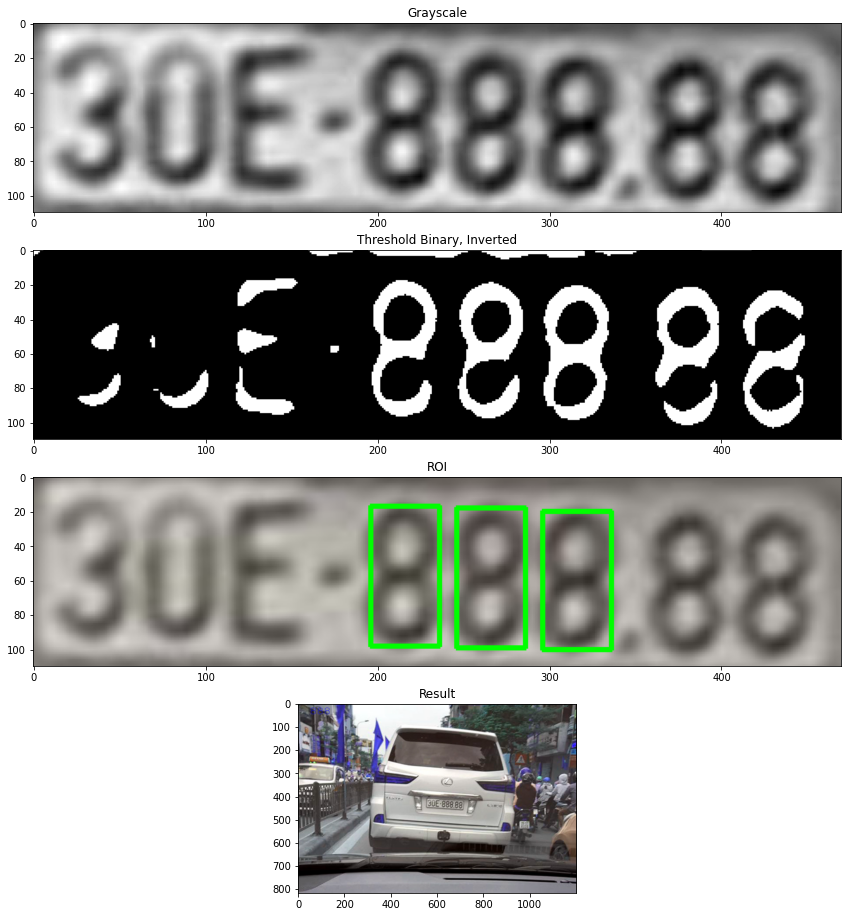

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from lib_detection import load_model, detect_lp, im2single

# Định nghĩa các ký tự có mặt trên biển số
char_list =  '0123456789ABCDEFGHKLMNPRSTUVXYZ'

# Hàm fine_tune dùng để loại bỏ các ký tự không liên quan
def fine_tune(lp):
    newString = ""
    for i in range(len(lp)):
        if lp[i] in char_list:
            newString += lp[i]
    return newString

# Hàm sắp xếp các contour từ trái sang phải theo đúng trật tự
def sort_contours(cnts):

    reverse = False
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes), key=lambda b: b[1][i], reverse=reverse))
    return cnts

def show_images(images, cols = 1, titles = None):
    
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

# Đường dẫn ảnh
img_path = "/content/CS114.K21/Automatic_License_Plate_Detection_SVM/test/test14.jpg"

# Load pre-trained license plate detecting model (WPOD-net)
wpod_net_path = "/content/CS114.K21/Automatic_License_Plate_Detection_SVM/wpod-net_update1.json"
wpod_net = load_model(wpod_net_path)

# Đọc file ảnh đầu vào
Ivehicle = cv2.imread(img_path)

# Khởi tạo kích thước lớn nhất và nhỏ nhất của 1 chiều ảnh
Dmax = 608
Dmin = 288

# Lấy tỷ lệ giữa W và H của ảnh và tìm ra chiều nhỏ nhất
ratio = float(max(Ivehicle.shape[:2])) / min(Ivehicle.shape[:2])
side = int(ratio * Dmin)
bound_dim = min(side, Dmax)

_ , LpImg, lp_type = detect_lp(wpod_net, im2single(Ivehicle), bound_dim, lp_threshold=0.5)

# Cấu hình tham số cho OCR model (SVM)
# Kích thước kí tự
digit_w = 30 # Width
digit_h = 60 # Height

# Load model
model_svm = cv2.ml.SVM_load('/content/CS114.K21/Automatic_License_Plate_Detection_SVM/svm.xml')

if (len(LpImg)):

    # Chuyển đổi ảnh biển số
    # Scale, tính toán các giá trị tuyệt đối và sau đó chuyển đổi kết quả sang dạng 8-bit
    LpImg[0] = cv2.convertScaleAbs(LpImg[0], alpha=(255.0))
    roi = LpImg[0]

    # Áp dụng kỹ thuật Grayscale Conversion để chuyển đổi ảnh biển số về ảnh xám
    gray = cv2.cvtColor( LpImg[0], cv2.COLOR_BGR2GRAY)
    

    # Áp dụng Threshold Binary, Inverted để phân tách số và nền
    #Simple Thresholding
    #binary = cv2.threshold(gray, 172, 255, cv2.THRESH_BINARY_INV)[1]
    
    # Adaptive Thresholding
    binary = cv2.adaptiveThreshold(gray, 100, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 12)
    #binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 12)

    # Otsu's thresholding after Gaussian filtering
    #blur = cv2.GaussianBlur(gray, (5,5), 0)
    #binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Segment kí tự
    kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    thre_mor = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)
    cont, _  = cv2.findContours(thre_mor, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Khởi tạo chuỗi rỗng để lưu trữ thông tin biển số
    plate_info = ""

    for c in sort_contours(cont):
        (x, y, w, h) = cv2.boundingRect(c)

        # Tỉ lệ h/w dùng để lọc những ký tự không liên quan
        ratio = h/w

        # Chọn các contour thỏa mãn yêu cầu tỉ lệ h/w phải nằm trong 
        # khoảng từ 1.5 đến 3.5
        if 1.5 <= ratio <= 3.5: 

            # Áp dụng kết quả sau khi áp dụng kĩ thuật ROI 
            # để chọn các contour có chiều cao từ 60% chiều cao biển số
            if h/roi.shape[0]>=0.6:

                # Vẽ khung chữ nhật quanh chữ số
                cv2.rectangle(roi, (x, y), (x + w, y + h), (0, 255, 0), 2)

                # Tách số và resize
                curr_num = thre_mor[y:y+h,x:x+w]
                curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
                
                # Áp dụng ROI - Region of Interest
                _, curr_num = cv2.threshold(curr_num, 30, 255, cv2.THRESH_BINARY)
                curr_num = np.array(curr_num,dtype=np.float32)
                curr_num = curr_num.reshape(-1, digit_w * digit_h)

                # Load vào model SVM
                result = model_svm.predict(curr_num)[1]
                result = int(result[0, 0])

                if result <= 9: 
                    # Nếu là số, đưa vào chuỗi kết quả luôn
                    result = str(result)
                else: 
                    # Nếu là chữ, chuyển đổi sang số bằng mã ASCII
                    # Sau đó mới đưa vào chuỗi kết quả
                    result = chr(result)

                # Gán chuỗi tạm vào chuỗi sau cùng
                plate_info +=result

    #cv2.imshow("Cac contour tim duoc", roi)
    
    # Ghi thông tin biển số lên trên ảnh
    cv2.putText(Ivehicle,fine_tune(plate_info),(50, 50), cv2.FONT_HERSHEY_PLAIN, 3.0, (0, 0, 255), lineType=cv2.LINE_AA)

    # Hiện thị kết quả cuối cùng
    print("Bien so =", plate_info)
    figs = np.array([gray, binary, roi, Ivehicle])
    show_images(figs, 4, ["Grayscale", "Threshold Binary, Inverted", "ROI", "Result"])
    #plt.imshow(gray)
    #plt.imshow(binary)
    #plt.imshow(roi)
    #plt.imshow(Ivehicle)
    #cv2.imshow("Hinh anh output",Ivehicle)

  